# **CO2 Emission Prediction using Non Linear Regression**

Previously we have done the data wrangling for the CO2emission dataset and have applied Simple and Multiple Linear Regression algorithms for prediction. Now, we are approaching Non Linear model, visualising the best fitted line and comparing the features obtained high accuracy.

In [ ]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2024-07-23 13:02:27--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2024-07-23 13:02:27 (1.85 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [ ]:
import pandas as pd

df = pd.read_csv('/content/FuelConsumption.csv')

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.corr(numeric_only = True)

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


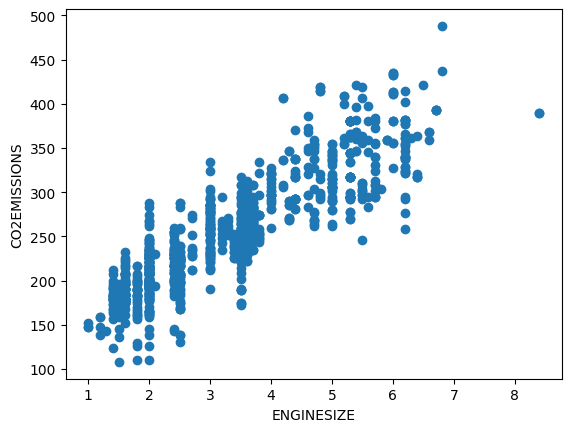

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS)

plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [ ]:
import numpy as np

msk = np.random.rand(len(df)) < 0.75

train = df[msk]
test = df[~msk]



##**Polynomial Regression Modeling**

$$y = b + \theta\_1  x + \theta\_2 x^2$$

In [ ]:

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures


#train the model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree = 2) #degree is to control the sensitivity of the curve towards the distribution of data

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#prediction

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#evaluation

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('The R2 score is:', r2_score(test_y, test_y_)*100)
print('The MSE is:', np.mean((test_y_ - test_y)**2))
print('The MAE is:', (np.mean(np.absolute(test_y_ - test_y)))*100)
print('The RMSE is:', np.sqrt(mean_squared_error(test_y, test_y_)))


The R2 score is: 76.74263686110504
The MSE is: 967.7373941433721
The MAE is: 2405.1010357123246
The RMSE is: 31.108477849990862


Text(0, 0.5, 'Emission')

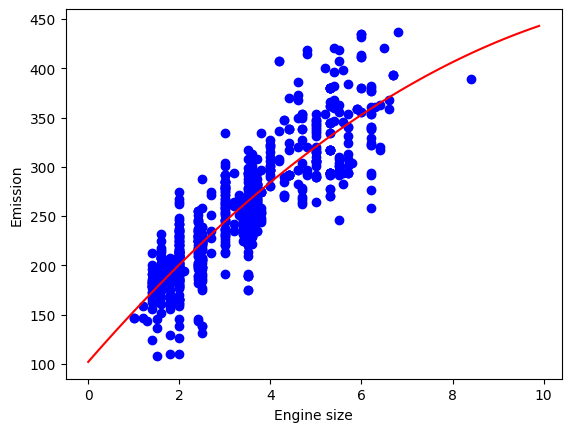

In [ ]:
#curvy line
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:

#to see the difference of curve in the the chart when tuning the degree level
#train the model

poly4 = PolynomialFeatures(degree = 4) #degree is to control the sensitivity of the curve towards the distribution of data

train_x_poly4 = poly4.fit_transform(train_x)

clf4 = linear_model.LinearRegression()

train_y_ = clf4.fit(train_x_poly4, train_y)

#prediction

test_x_poly4 = poly4.fit_transform(test_x)

test_y_ = clf4.predict(test_x_poly4)

#evaluation

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('The R2 score is:', r2_score(test_y, test_y_)*100)
print('The MSE is:', np.mean((test_y_ - test_y)**2))
print('The MAE is:', (np.mean(np.absolute(test_y_ - test_y)))*100)
print('The RMSE is:', np.sqrt(mean_squared_error(test_y, test_y_)))


The R2 score is: 76.77168142738253
The MSE is: 966.5288515964139
The MAE is: 2400.4711448352605
The RMSE is: 31.08904713233286


Text(0, 0.5, 'Emission')

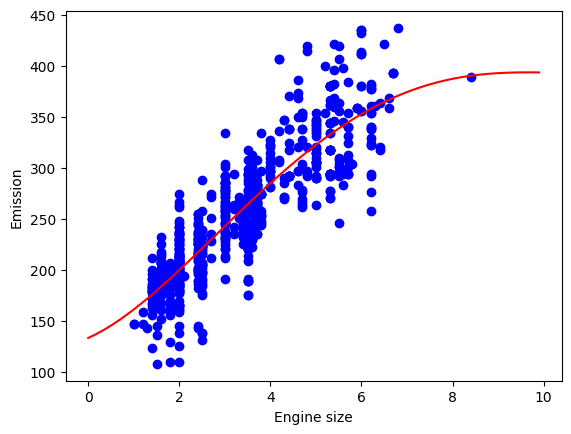

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf4.intercept_[0]+ clf4.coef_[0][1]*XX + clf4.coef_[0][2]*np.power(XX, 2) + clf4.coef_[0][3]*np.power(XX, 3) + clf4.coef_[0][4]*np.power(XX, 4)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:
#to see the difference of curve the chart when tuning the degree level
#train the model

poly6 = PolynomialFeatures(degree = 6) #degree is to control the sensitivity of the curve towards the distribution of data

train_x_poly6 = poly6.fit_transform(train_x)

clf6 = linear_model.LinearRegression()

train_y_ = clf6.fit(train_x_poly6, train_y)

#prediction

test_x_poly6 = poly6.fit_transform(test_x)

test_y_ = clf6.predict(test_x_poly6)

#evaluation

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('The R2 score is:', r2_score(test_y, test_y_)*100)
print('The MSE is:', np.mean((test_y_ - test_y)**2))
print('The MAE is:', (np.mean(np.absolute(test_y_ - test_y)))*100)
print('The RMSE is:', np.sqrt(mean_squared_error(test_y, test_y_)))

The R2 score is: 76.98513063821564
The MSE is: 957.6472435723239
The MAE is: 2401.374372998013
The RMSE is: 30.945876034979587


Text(0, 0.5, 'Emission')

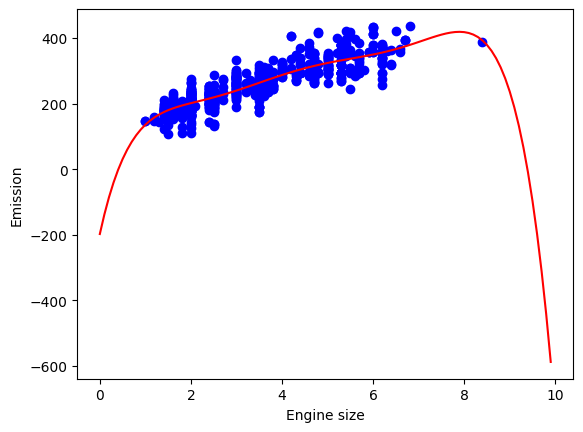

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf6.intercept_[0]+ clf6.coef_[0][1]*XX + clf6.coef_[0][2]*np.power(XX, 2) + clf6.coef_[0][3]*np.power(XX, 3) + clf6.coef_[0][4]*np.power(XX, 4) +  clf6.coef_[0][5]*np.power(XX, 5) +  clf6.coef_[0][6]*np.power(XX, 6)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:
poly10 = PolynomialFeatures(degree = 10) #degree is to control the sensitivity of the curve towards the distribution of data

train_x_poly10 = poly10.fit_transform(train_x)

clf10 = linear_model.LinearRegression()

train_y_ = clf10.fit(train_x_poly10, train_y)

#prediction

test_x_poly10 = poly10.fit_transform(test_x)

test_y_ = clf10.predict(test_x_poly10)

#evaluation

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('The R2 score is:', r2_score(test_y, test_y_)*100)
print('The MSE is:', np.mean((test_y_ - test_y)**2))
print('The MAE is:', (np.mean(np.absolute(test_y_ - test_y)))*100)
print('The RMSE is:', np.sqrt(mean_squared_error(test_y, test_y_)))

The R2 score is: 77.51521732231785
The MSE is: 935.590370517559
The MAE is: 2369.1047133932316
The RMSE is: 30.58742176970068


Text(0, 0.5, 'Emission')

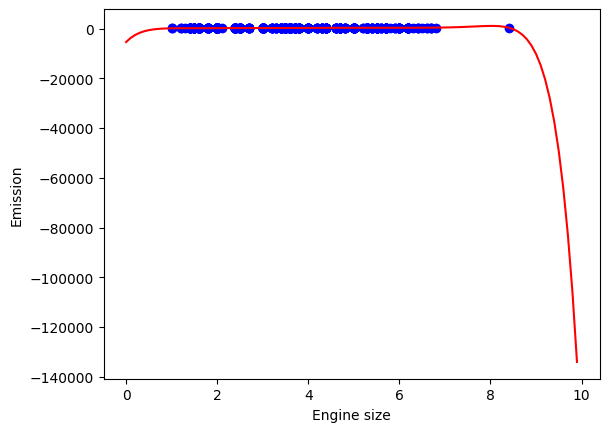

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf10.intercept_[0]+ clf10.coef_[0][1]*XX + clf10.coef_[0][2]*np.power(XX, 2) + clf10.coef_[0][3]*np.power(XX, 3) + clf10.coef_[0][4]*np.power(XX, 4) +  clf10.coef_[0][5]*np.power(XX, 5) +  clf10.coef_[0][6]*np.power(XX, 6) + clf10.coef_[0][7]*np.power(XX, 7) + clf10.coef_[0][8]*np.power(XX, 8) + clf10.coef_[0][9]*np.power(XX, 9) + clf10.coef_[0][10]*np.power(XX, 10)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures


#train the model
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

poly2 = PolynomialFeatures(degree = 6) #degree is to control the sensitivity of the curve towards the distribution of data

train_x_poly2 = poly2.fit_transform(train_x)

clf2 = linear_model.LinearRegression()

train_y_ = clf2.fit(train_x_poly2, train_y)

#prediction

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly2 = poly2.fit_transform(test_x)

test_y_ = clf2.predict(test_x_poly2)

#evaluation

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('The R2 score is:', r2_score(test_y, test_y_)*100)
print('The MSE is:', np.mean((test_y_ - test_y)**2))
print('The MAE is:', (np.mean(np.absolute(test_y_ - test_y)))*100)
print('The RMSE is:', np.sqrt(mean_squared_error(test_y, test_y_)))


The R2 score is: 84.06527971564428
The MSE is: 663.0426928578551
The MAE is: 1340.2530308248747
The RMSE is: 25.749615392425866


Text(0, 0.5, 'Emission')

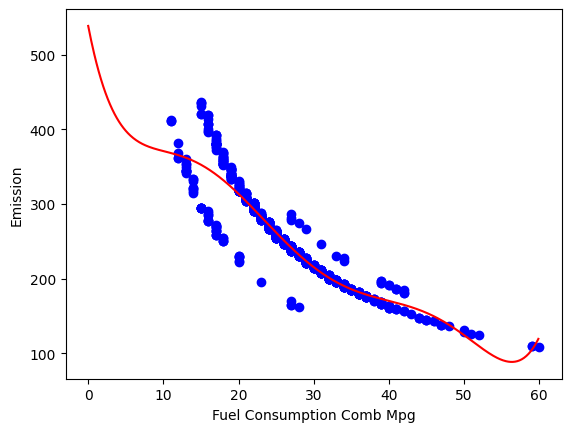

In [ ]:
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 60.0, 0.1)
yy = clf2.intercept_[0]+ clf2.coef_[0][1]*XX + clf2.coef_[0][2]*np.power(XX, 2) + clf2.coef_[0][3]*np.power(XX, 3) + clf2.coef_[0][4]*np.power(XX, 4) +  clf2.coef_[0][5]*np.power(XX, 5) +  clf2.coef_[0][6]*np.power(XX, 6)
plt.plot(XX, yy, '-r' )
plt.xlabel("Fuel Consumption Comb Mpg")
plt.ylabel("Emission")